In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
os.getcwd()

'D:\\UMass\\Spring20\\685\\Project'

In [4]:
def get_pandas_df(filename):
    with open(filename, 'r', encoding="UTF-8") as datafile:
        data = [line.strip().split(',', maxsplit=1) for line in datafile]
        data_text = list(map(lambda x: x[1], data))
        data_label = list(map(lambda x: int(x[0].strip()[-1]), data))
    full_df = pd.DataFrame({"text": data_text, "label": data_label})
    return full_df

In [5]:
reddit_data = get_pandas_df('./Reddit/reddit_train.txt')
gab_data = get_pandas_df('./Gab/gab_train.txt')
hasoc_data = get_pandas_df('./english_dataset/english_dataset/nn_Data/bert_hasoc_data.train')

In [6]:
reddit_data['label'].value_counts()

0    13578
1     4210
Name: label, dtype: int64

In [7]:
gab_data['label'].value_counts()

0    15296
1    11724
Name: label, dtype: int64

In [8]:
hasoc_data['label'].value_counts()

0    3591
1    1143
2     667
3     451
Name: label, dtype: int64

In [20]:
reddit_data[reddit_data['label'] == 1]

,text,label
1,yes . i wish the cunt would leave the us to ...,1
5,hahaha obama is a fucking retard they never ...,1
7,i would unironically enjoy the fuck out of th...,1
11,"the problem is people do say that, it's retar...",1
12,i recently moved to a community that has many...,1
...,...,...
17773,even niggers would be crazy not to take that ...,1
17774,no wonder muslims are fucking retarded .,1
17777,at this point i've decided that it just isn't...,1
17781,you’ll never fully realize this until you dum...,1


In [21]:
hasoc_data

,text,label
0,"""[HASHTAG] dhonikeepstheglove | watch: sports ...",0
1,[USER] no. we should remember very clearly tha...,1
2,[USER] guess who would be the winner of this [...,0
3,corbyn is too politically intellectual for [HA...,0
4,all the best to [HASHTAG] teamindia for anothe...,0
...,...,...
5847,"""[USER] [USER] that's cute and all, but absolu...",2
5848,a recession issa comin' [HASHTAG] maga [HASHTA...,0
5849,[HASHTAG] doctorsfightback will 'the mad n irr...,3
5850,"""[HASHTAG] shiningindia [HASHTAG] educatedindi...",3


In [22]:
from collections import Counter

In [36]:
import re
from nltk import TweetTokenizer, PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

In [45]:
def preprocessor(tweet):
#     global vocab
    tokenizer = TweetTokenizer()
    stops = set(stopwords.words("english"))
    # porter = PorterStemmer()
    # lemmatizer = WordNetLemmatizer()
    tweet = tweet.lower()
    tweet = re.sub(r"^RT ", ' [RT] ', tweet)
    while len(re.findall(r'@[^ :]*:?', tweet)) >= 1:
        tweet = re.sub(r'@[^ :]*:?', ' [USER] ', tweet)
    tweet = re.sub(r"http[s]?:\/\/[^ \n]*", ' [LINK] ', tweet)
    tweet = re.sub(r"\s+", ' ', tweet)
    tweet = re.sub(r'[‘’“”…]', ' <quote> ', tweet)
    tweet = re.sub(r'#', ' <hashtag> ', tweet)
    # tokens = tweet.strip().split()
    # tokens = tweet
    tokens = tokenizer.tokenize(tweet)
    puncs = str.maketrans('', '', punctuation)
    tokens = [w.translate(puncs) for w in tokens]
    tokens = [w for w in tokens if not len(w) < 1]
    tokens = [w for w in tokens if not w in stops]
    # tokens = ['[hashtag]' for w in tokens if w == ]'#']
    # tokens = [porter.stem(w) for w in tokens]
    # tokens = [lemmatizer.lemmatize(w) for w in tokens]
#     for word in tokens:
#         if word not in vocab.keys():
#             vocab[word] = 1
#         else:
#             vocab[word] += 1
    return " ".join(tokens)

In [46]:
hdf = hasoc_data.copy(deep=True)

In [47]:
hdf.text = hdf.text.apply(preprocessor)

In [48]:
hdf

,text,label
0,hashtag dhonikeepstheglove watch sports minist...,0
1,user remember clearly hashtag individual 1 adm...,1
2,user guess would winner hashtag cwc 19 team ge...,0
3,corbyn politically intellectual hashtag borisj...,0
4,best hashtag teamindia another swimming compet...,0
...,...,...
5847,user user thats cute absolutely true thats wor...,2
5848,recession issa comin hashtag maga hashtag maga...,0
5849,hashtag doctorsfightback mad n irrational dict...,3
5850,hashtag shiningindia hashtag educatedindia lik...,3


In [59]:
Counter(" ".join(hdf[hdf["label"] == 2]["text"]).split()).most_common(100)

[('hashtag', 1784),
 ('user', 671),
 ('fucktrump', 315),
 ('link', 293),
 ('quote', 209),
 ('fuck', 127),
 ('dickhead', 108),
 ('trump', 92),
 ('fucking', 64),
 ('douchebag', 64),
 ('like', 46),
 ('shit', 43),
 ('😡', 38),
 ('resist', 38),
 ('get', 37),
 ('trumpisatraitor', 37),
 ('world', 36),
 ('one', 33),
 ('2020', 31),
 ('people', 31),
 ('n', 29),
 ('resisttrump', 29),
 ('ass', 27),
 ('think', 26),
 ('country', 26),
 ('😂', 26),
 ('would', 26),
 ('good', 25),
 ('go', 25),
 ('u', 25),
 ('time', 25),
 ('doctor', 25),
 ('shameonicc', 24),
 ('know', 24),
 ('day', 24),
 ('going', 23),
 ('even', 23),
 ('president', 23),
 ('america', 23),
 ('say', 23),
 ('rain', 22),
 ('sex', 22),
 ('🖕', 22),
 ('johnmccainday', 22),
 ('️', 21),
 ('impeachtrump', 21),
 ('us', 21),
 ('want', 20),
 ('make', 20),
 ('cup', 19),
 ('birthday', 19),
 ('impeachtrumpnow', 19),
 ('see', 19),
 ('rapist', 19),
 ('murderer', 19),
 ('piece', 18),
 ('really', 18),
 ('moron', 17),
 ('19', 17),
 ('happy', 17),
 ('f', 17),
 (

In [9]:
s1 = pd.Series(reddit_data['label'].value_counts(), name='Reddit')
s2 = pd.Series(gab_data['label'].value_counts(), name='Gab')
s3 = pd.Series(hasoc_data['label'].value_counts(), name='Hasoc')

In [10]:
vals = pd.concat([s1, s2, s3], axis=1).fillna(0)

In [11]:
vals['Reddit'] = vals['Reddit'] / sum(vals['Reddit'])
vals['Gab'] = vals['Gab'] / sum(vals['Gab'])
vals['Hasoc'] = vals['Hasoc'] / sum(vals['Hasoc'])

In [12]:
vals

,Reddit,Gab,Hasoc
0,0.763324,0.566099,0.613636
1,0.236676,0.433901,0.195318
2,0.000000,0.000000,0.113978
3,0.000000,0.000000,0.077068


In [10]:
# sns.set(style="ticks")

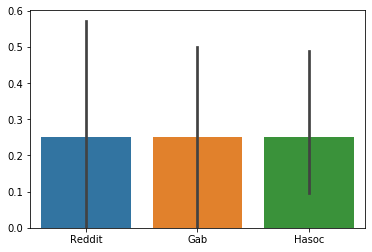

In [13]:
# f, ax = plt.subplots(figsize=(4,3))
sns.barplot(data=vals)
# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)

In [14]:
from itertools import cycle, islice

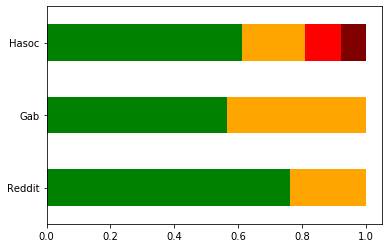

In [15]:
vals.T.plot(kind='barh', stacked=True, legend=False, color=list(islice(cycle(['green', 'orange', 'red', 'maroon']), None, len(vals))))

In [34]:
dat = []
dat.append(['LR(WE)', 0.67, 0.78, 0.35])
dat.append(['LR(CV)', 0.87, 0.91, 0.44])
dat.append(['LR(TF-IDF)', 0.79, 0.90, 0.38])
dat.append(['CNN', 0.88, 0.91, 0.44])
dat.append(['Bi-LSTM', 0.86, 0.90, 0.47])
dat.append(['BERT', 0.88, 0.92, 0.55])

In [35]:
df = pd.DataFrame(data=dat, columns=['Model', 'Reddit', 'Gab', 'Twitter'])
df

,Model,Reddit,Gab,Twitter
0,LR(WE),0.67,0.78,0.35
1,LR(CV),0.87,0.91,0.44
2,LR(TF-IDF),0.79,0.90,0.38
3,CNN,0.88,0.91,0.44
4,Bi-LSTM,0.86,0.90,0.47
5,BERT,0.88,0.92,0.55


In [57]:
df1 = df[['Reddit', 'Gab', 'Twitter']]
df1.index = df['Model']
df1

,Reddit,Gab,Twitter
Model,,,
LR(WE),0.67,0.78,0.35
LR(CV),0.87,0.91,0.44
LR(TF-IDF),0.79,0.90,0.38
CNN,0.88,0.91,0.44
Bi-LSTM,0.86,0.90,0.47
BERT,0.88,0.92,0.55


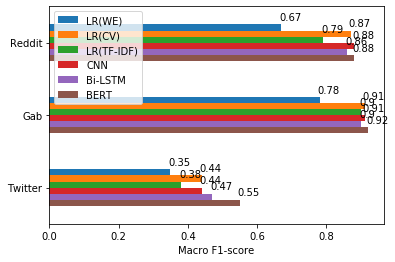

In [106]:
ax = df1.T.plot(kind='barh', legend=True, sort_columns=True)
ax.set_xlabel('Macro F1-score')
ax.legend(loc='upper left')
plt.gca().invert_yaxis()
for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width() * 1.0, p.get_y()), xytext=(-2, 4), textcoords='offset points')
#     ax.annotate(str(int(p.get_width())), (p.get_x() + p.get_width(), p.get_y()), xytext=(-2, 4), textcoords='offset points', horizontalalignment='right')